In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import collections

In [44]:
df = pd.read_csv('../../spreadsheet_data/deterioration_vs_distance.csv')

X = df['dist'].to_numpy().reshape(-1, 1)
y = df['deteriorated'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [45]:
log_reg = LogisticRegression(random_state=0, class_weight='balanced')
log_reg.fit(X_train, y_train)   

LogisticRegression(class_weight='balanced', random_state=0)

In [46]:
arr = log_reg.predict(X_train)
counter = collections.Counter(arr)
print(counter)

Counter({0: 2747, 1: 2674})


In [47]:
log_reg.score(X_train, y_train)

0.529422615753551

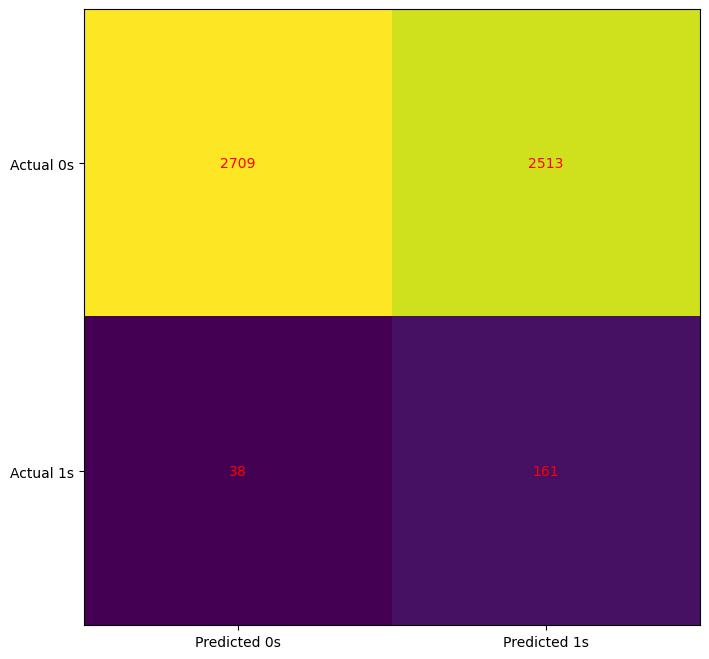

In [48]:
cm = confusion_matrix(y_train, log_reg.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()